In [1]:
# Install spaCy if not already installed
!pip install -U spacy

# Download spaCy English model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.2
    Uninstalling spacy-3.7.2:
      Successfully uninstalled spacy-3.7.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load financial dataset
financial_data_path = '/content/drive/MyDrive/AAPL Financial Report.xlsx'
financial_data = pd.read_excel(financial_data_path)

# Load mapped responses
mapped_responses_path = '/content/drive/MyDrive/mapping.xlsx'
mapped_responses = pd.read_excel(mapped_responses_path)
financial_data


Year  Market Cap  Revenue  Gross Profit  Net Income  Earning Per Share  \
0   2022     2066.94   394328        170782       99803             6.1100   
1   2021     2913.28   365817        152836       94680             5.6100   
2   2020     2255.97   274515        104956       57411             3.2800   
3   2019     1304.76   260174         98392       55256             2.9700   
4   2018      748.54   265595        101839       59531             2.9800   
5   2017      868.87   229234         88186       48351             2.3025   
6   2016      617.59   215639         84263       45687             2.0775   
7   2015      586.86   233715         93626       53394             2.3050   
8   2014      647.36   182795         70537       39510             1.6125   
9   2013      504.79   170910         64304       37037             1.4200   
10  2012      500.61   156508         68662       41733             1.5775   
11  2011      376.40   108249         43818       25922             0.9886   
12  2010      296.89    65225         25684       14013             0.5411   
13  2009      189.80    42905         17222        8235             0.3243   

    EBITDA  Share Holder Equity  Cash Flow from Operating  \
0   130541                50672                    122151   
1   120233                63090                    104038   
2    77344                65339                     80674   
3    76477                90488                     69391   
4    81801               107147                     77434   
5    71501               134047                     64225   
6    70529               128249                     66231   
7    82487               119355                     81266   
8    60449               111547                     59713   
9    55756               123549                     53666   
10   58518               118210                     50856   
11   35604                76615                     37529   
12   19412                47791                     18595   
13   12474                31640                     10159   

    Cash Flow from Investing  Cash Flow from Financial Activities  \
0                     -22354                              -110749   
1                     -14545                               -93353   
2                      -4289                               -86820   
3                      45896                               -90976   
4                      16066                               -87876   
5                     -46446                               -17974   
6                     -45977                               -20890   
7                     -56274                               -17716   
8                     -22579                               -37549   
9                     -33774                               -16379   
10                    -48227                                -1698   
11                    -40419                                 1444   
12                    -13854                                 1257   
13                    -17434                                  663   

    Current Ratio  Debt/Equity Ratio       ROE      ROA      ROI  \
0          0.8794             2.3695  196.9589  28.2924  66.6994   
1          1.0746             1.9768  150.0713  26.9742  54.9839   
2          1.3636             1.7208   87.8664  17.7256  35.0054   
3          1.5401             1.1940   61.0645  16.3230  30.3113   
4          1.1329             1.0685   55.5601  16.2775  29.6348   
5          1.2761             0.8630   36.0702  12.8826  20.9082   
6          1.3527             0.6786   35.6237  14.2024  22.4312   
7          1.1088             0.5390   44.7355  18.3899  30.9201   
8          1.0801             0.3164   35.4201  17.0420  28.1142   
9          1.6786             0.1373   29.9776  17.8923  26.3592   
10         1.4958             0.0000   35.3041  23.7033  35.3041   
11         1.6084             0.0000   33.8341  22.2753  33.8341 

In [5]:
# Print column names and first few rows of mapped_responses DataFrame
#print(mapped_responses.columns)
#print(mapped_responses.head())

In [6]:
# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores

# Function to perform linear regression for a specific financial term
def linear_regression_for_term(financial_term):
    # Extract data for the specific financial term
    X = financial_data["Year"].values
    y = financial_data[financial_term].values
    # Train linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    # Predict values for the next 5 years
    future_years = np.arange(financial_data.Year.max() + 1, financial_data.Year.max() + 6).reshape(-1, 1)
    predicted_values = model.predict(future_years)
    return future_years, predicted_values

    # Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(financial_data["Year"], financial_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title('Linear Regression for ' + financial_term)
    plt.legend()
    plt.show()

# Function to detect financial term from user query
def detect_financial_term(user_query):
    financial_terms = ["Market Cap","Revenue","Gross Profit","Net Income","Earning Per Share","EBITDA","Share Holder Equity","Cash Flow from Operating","Cash Flow from Investing","Cash Flow from Financial Activities","Current Ratio","Debt/Equity Ratio","ROE","ROA","ROI","Net Profit Margin","Free Cash Flow per Share","Return on Tangible Equity"]
    # Extract financial terms from the financial data index
    #financial_terms = financial_data.ft.tolist()

    # Iterate over each financial term and check if it appears in the user query
    for term in financial_terms:
        if re.search(r'\b' + re.escape(str(term)) + r'\b', user_query, re.IGNORECASE):
            return term  # Return the detected financial term
    return None  # Return None if no financial term is detected

# Modify the handle_user_query function to call linear regression function if specified
def handle_user_query(user_query):
    # Preprocess user query
    vectorizer = TfidfVectorizer()
    user_query_vectorized = vectorizer.fit_transform([user_query])

    # Extract keywords, functions, and responses from mapped_responses DataFrame
    keywords = vectorizer.transform(mapped_responses['keywords'].values)
    functions = mapped_responses['function'].values
    responses = mapped_responses['response'].values

    # Calculate cosine similarity between user query and keywords
    similarity_scores = calculate_cosine_similarity(user_query_vectorized, keywords)

    # Find index of highest similarity score
    max_index = np.argmax(similarity_scores)

    # Get function and response corresponding to highest similarity score
    function = functions[max_index]
    response = responses[max_index]

    # If a function is specified, call the function
    if not pd.isnull(function):
        if function == 'linear':
            # Detect financial term from user query
            financial_term = detect_financial_term(user_query)
            if financial_term:
                future_years, predicted_values = linear_regression_for_term(financial_term)
                plot_linear_regression(financial_term, future_years, predicted_values)
                response = f"Predicted {financial_term} for the next 5 years: {predicted_values}"
            else:
                response = "Financial term not detected in the user query."
        else:
            return globals()[function]()  # Call other specified function
    # If a response is specified, return the response
    elif not pd.isnull(response):
        return response

    return response  # Return the response at the end of the function

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(user_input)
    print("Investo:", response)

You: bye
Investo: Goodbye! Have a great day.


You: hey
Investo: Financial term not detected in the user query.
You: hello
Investo: Hello, I'm investo. How are you doing today?
You: predict revenue
Revenue Data:
Year: 2022, Revenue: 394328
Year: 2021, Revenue: 365817
Year: 2020, Revenue: 274515
Year: 2019, Revenue: 260174
Year: 2018, Revenue: 265595
Year: 2017, Revenue: 229234
Year: 2016, Revenue: 215639
Year: 2015, Revenue: 233715
Year: 2014, Revenue: 182795
Year: 2013, Revenue: 170910
Year: 2012, Revenue: 156508
Year: 2011, Revenue: 108249
Year: 2010, Revenue: 65225
Year: 2009, Revenue: 42905

Predicted Revenue for the next 5 years:
Year: 2023, Predicted Revenue: 388066.5714285746
Year: 2024, Predicted Revenue: 411564.8857142925
Year: 2025, Predicted Revenue: 435063.200000003
Year: 2026, Predicted Revenue: 458561.5142857209
Year: 2027, Predicted Revenue: 482059.82857143134


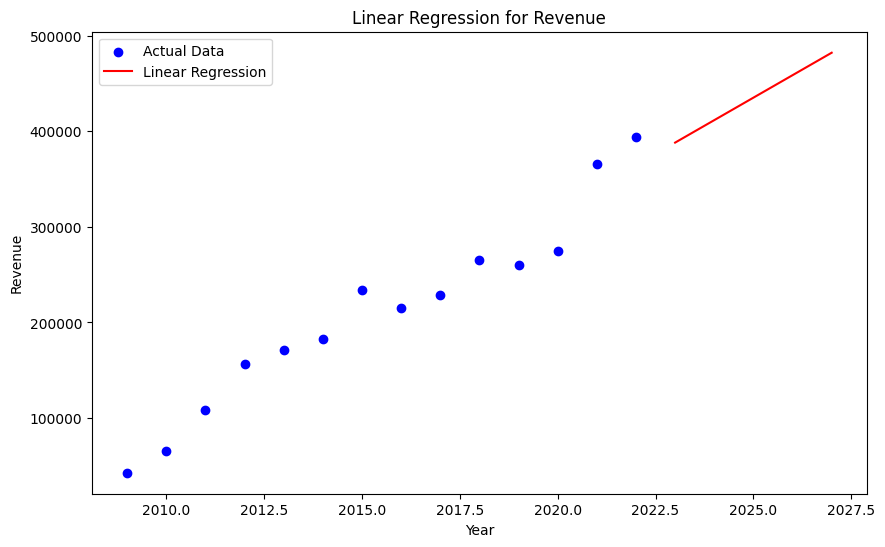

Investo: Predicted Revenue for the next 5 years: [388066.57142857 411564.88571429 435063.2        458561.51428572
 482059.82857143]
You: revenue in 2019
Revenue Data:
Year: 2022, Revenue: 394328
Year: 2021, Revenue: 365817
Year: 2020, Revenue: 274515
Year: 2019, Revenue: 260174
Year: 2018, Revenue: 265595
Year: 2017, Revenue: 229234
Year: 2016, Revenue: 215639
Year: 2015, Revenue: 233715
Year: 2014, Revenue: 182795
Year: 2013, Revenue: 170910
Year: 2012, Revenue: 156508
Year: 2011, Revenue: 108249
Year: 2010, Revenue: 65225
Year: 2009, Revenue: 42905

Predicted Revenue for the next 5 years:
Year: 2023, Predicted Revenue: 388066.5714285746
Year: 2024, Predicted Revenue: 411564.8857142925
Year: 2025, Predicted Revenue: 435063.200000003
Year: 2026, Predicted Revenue: 458561.5142857209
Year: 2027, Predicted Revenue: 482059.82857143134


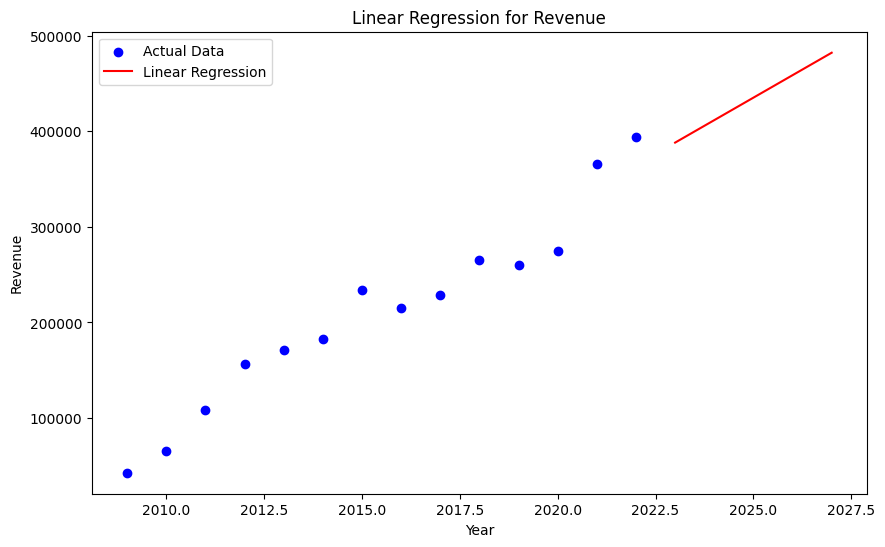

Investo: Predicted Revenue for the next 5 years: [388066.57142857 411564.88571429 435063.2        458561.51428572
 482059.82857143]
You: bye
Investo: Goodbye! Have a great day.


In [7]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression

# Assuming you have financial_data and mapped_responses defined previously

# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores

# Function to perform linear regression for a specific financial term
def linear_regression_for_term(financial_term):
    # Extract data for the specific financial term
    X = financial_data["Year"].values
    y = financial_data[financial_term].values
    # Train linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    # Predict values for the next 5 years
    future_years = np.arange(financial_data.Year.max() + 1, financial_data.Year.max() + 6).reshape(-1, 1)
    predicted_values = model.predict(future_years)

    # Print all the available data for the financial term
    print(f"{financial_term} Data:")
    for year, value in zip(X, y):
        print(f"Year: {year}, {financial_term}: {value}")

    # Print the predicted data for the next 5 years
    print(f"\nPredicted {financial_term} for the next 5 years:")
    for year, predicted_value in zip(future_years.flatten(), predicted_values):
        print(f"Year: {year}, Predicted {financial_term}: {predicted_value}")

    return future_years, predicted_values

# Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(financial_data["Year"], financial_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title('Linear Regression for ' + financial_term)
    plt.legend()
    plt.show()


# Function to detect financial term from user query
def detect_financial_term(user_query):
    financial_terms = ["Market Cap","Revenue","Gross Profit","Net Income","Earning Per Share","EBITDA","Share Holder Equity","Cash Flow from Operating","Cash Flow from Investing","Cash Flow from Financial Activities","Current Ratio","Debt/Equity Ratio","ROE","ROA","ROI","Net Profit Margin","Free Cash Flow per Share","Return on Tangible Equity"]
    # Iterate over each financial term and check if it appears in the user query
    for term in financial_terms:
        if re.search(r'\b' + re.escape(str(term)) + r'\b', user_query, re.IGNORECASE):
            return term  # Return the detected financial term
    return None  # Return None if no financial term is detected

# Modify the handle_user_query function to call linear regression function if specified
def handle_user_query(user_query):
    # Preprocess user query
    vectorizer = TfidfVectorizer()
    user_query_vectorized = vectorizer.fit_transform([user_query])

    # Extract keywords, functions, and responses from mapped_responses DataFrame
    keywords = vectorizer.transform(mapped_responses['keywords'].values)
    functions = mapped_responses['function'].values
    responses = mapped_responses['response'].values

    # Calculate cosine similarity between user query and keywords
    similarity_scores = calculate_cosine_similarity(user_query_vectorized, keywords)

    # Find index of highest similarity score
    max_index = np.argmax(similarity_scores)

    # Get function and response corresponding to highest similarity score
    function = functions[max_index]
    response = responses[max_index]

    # If a function is specified, call the function
    if not pd.isnull(function):
        if function == 'linear':
            # Detect financial term from user query
            financial_term = detect_financial_term(user_query)
            if financial_term:
                future_years, predicted_values = linear_regression_for_term(financial_term)
                plot_linear_regression(financial_term, future_years, predicted_values)
                response = f"Predicted {financial_term} for the next 5 years: {predicted_values}"
            else:
                response = "Financial term not detected in the user query."
        else:
            return globals()[function]()  # Call other specified function

    # If a response is specified, return the response
    elif not pd.isnull(response):
        return response

    return response  # Return the response at the end of the function

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(user_input)
    print("Investo:", response)


**The last part is still WIP.**

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression

# Assuming you have financial_data and mapped_responses defined previously

# Implement cosine similarity function
def calculate_cosine_similarity(query, keywords):
    # Calculate cosine similarity between query and keywords
    similarity_scores = cosine_similarity(query, keywords)
    return similarity_scores

# Function to perform linear regression for a specific financial term
def linear_regression_for_term(financial_term, perform_regression=True):
    # Extract data for the specific financial term
    X = financial_data["Year"].values
    y = financial_data[financial_term].values

    if perform_regression:
        # Train linear regression model
        model = LinearRegression()
        model.fit(X.reshape(-1, 1), y)
        # Predict values for the next 5 years
        future_years = np.arange(financial_data.Year.max() + 1, financial_data.Year.max() + 6).reshape(-1, 1)
        predicted_values = model.predict(future_years)

        # Print all the available data for the financial term
        print(f"{financial_term} Data:")
        for year, value in zip(X, y):
            print(f"Year: {year}, {financial_term}: {value}")

        # Print the predicted data for the next 5 years
        print(f"\nPredicted {financial_term} for the next 5 years:")
        for year, predicted_value in zip(future_years.flatten(), predicted_values):
            print(f"Year: {year}, Predicted {financial_term}: {predicted_value}")

        return future_years, predicted_values
    else:
        # Just print the available data for the financial term
        print(f"{financial_term} Data:")
        for year, value in zip(X, y):
            print(f"Year: {year}, {financial_term}: {value}")

# Function to plot the linear regression
def plot_linear_regression(financial_term, future_years, predicted_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(financial_data["Year"], financial_data[financial_term], color='blue', label='Actual Data')
    plt.plot(future_years, predicted_values, color='red', label='Linear Regression')
    plt.xlabel('Year')
    plt.ylabel(financial_term)
    plt.title('Linear Regression for ' + financial_term)
    plt.legend()
    plt.show()


# Function to detect financial term from user query
def detect_financial_term(user_query):
    financial_terms = ["Market Cap","Revenue","Gross Profit","Net Income","Earning Per Share","EBITDA","Share Holder Equity","Cash Flow from Operating","Cash Flow from Investing","Cash Flow from Financial Activities","Current Ratio","Debt/Equity Ratio","ROE","ROA","ROI","Net Profit Margin","Free Cash Flow per Share","Return on Tangible Equity"]
    # Iterate over each financial term and check if it appears in the user query
    for term in financial_terms:
        if re.search(r'\b' + re.escape(str(term)) + r'\b', user_query, re.IGNORECASE):
            return term  # Return the detected financial term
    return None  # Return None if no financial term is detected

# Example usage
def handle_user_query(user_query):
    # Detect financial term from user query
    financial_term = detect_financial_term(user_query)
    if financial_term:
        if "predict" in user_query.lower():
            return linear_regression_for_term(financial_term)
        else:
            linear_regression_for_term(financial_term, perform_regression=False)
    else:
        return "Financial term not detected in the user query."

# Example usage
while True:
    user_input = input("You: ")

    # If user input contains "bye", break the loop
    if "bye" in user_input.lower():
        print("Investo: Goodbye! Have a great day.")
        break

    # If user input is not a greeting or goodbye, handle as a regular query
    response = handle_user_query(user_input)
    print("Investo:", response)


You: hello
Investo: Financial term not detected in the user query.
You: bye
Investo: Goodbye! Have a great day.
